In [2]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import os
import requests
import json
from config import api_key

base_url = "https://maps.googleapis.com/maps/api/geocode/json"
county_file= os.path.join('..','Resources','county_vote_df.csv')
region_file= os.path.join('..','Resources','region_vote_df.csv')

In [3]:
county_vote_df = pd.read_csv(county_file)

In [4]:
county_vote_df["Lat"] = ""
county_vote_df["Lng"] = ""
county_vote_df.head()

,Unnamed: 0,Region,Area,Electorate,Pct_Turnout,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Lat,Lng
0,0,East,Peterborough,120892,72.35,87392,34176,53216,0.391066,0.608934,,
1,1,East,Luton,127612,66.31,84481,36708,47773,0.434512,0.565488,,
2,2,East,Southend-on-Sea,128856,72.90,93870,39348,54522,0.419175,0.580825,,
3,3,East,Thurrock,109897,72.75,79916,22151,57765,0.277179,0.722821,,
4,4,East,Bedford,119530,72.06,86066,41497,44569,0.482153,0.517847,,


In [5]:
non_Eng = ['Wales', 'Scotland', 'Northern Ireland']

In [6]:
params = {"key":api_key}

for index, row in county_vote_df.iterrows():
    if row['Region'] not in non_Eng:
        if row['Area'] == 'Herefordshire, County of':
            city = "Herefordshire County, United Kingdom"
        else:
            city = "{0}, United Kingdom".format(row['Area'])
        params["address"] = city
        areas_lat_lng = requests.get(base_url, params=params)
        
        areas_lat_lng = areas_lat_lng.json()
        
        try:
            county_vote_df.loc[index, "Lat"] = areas_lat_lng["results"][0]["geometry"]["location"]["lat"]
            county_vote_df.loc[index, "Lng"] = areas_lat_lng["results"][0]["geometry"]["location"]["lng"]
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
    else: 
        city = row['Area']
        params["address"] = city
        areas_lat_lng = requests.get(base_url, params=params)
        
        areas_lat_lng = areas_lat_lng.json()
        
        try:
            county_vote_df.loc[index, "Lat"] = areas_lat_lng["results"][0]["geometry"]["location"]["lat"]
            county_vote_df.loc[index, "Lng"] = areas_lat_lng["results"][0]["geometry"]["location"]["lng"]
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
            
county_vote_df.head(10)

,Unnamed: 0,Region,Area,Electorate,Pct_Turnout,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Lat,Lng
0,0,East,Peterborough,120892,72.35,87392,34176,53216,0.391066,0.608934,52.5695,-0.24053
1,1,East,Luton,127612,66.31,84481,36708,47773,0.434512,0.565488,51.8787,-0.420025
2,2,East,Southend-on-Sea,128856,72.90,93870,39348,54522,0.419175,0.580825,51.5459,0.707712
3,3,East,Thurrock,109897,72.75,79916,22151,57765,0.277179,0.722821,51.4935,0.35292
4,4,East,Bedford,119530,72.06,86066,41497,44569,0.482153,0.517847,52.136,-0.466655
5,5,East,Central Bedfordshire,204004,77.89,158804,69670,89134,0.438717,0.561283,52.003,-0.465139
6,6,East,Cambridge,80108,72.22,57799,42682,15117,0.738456,0.261544,52.2053,0.121817
7,7,East,East Cambridgeshire,62435,77.08,48086,23599,24487,0.490767,0.509233,52.4037,0.242812
8,8,East,Fenland,71447,73.69,52626,15055,37571,0.286075,0.713925,52.5745,0.0487678
9,9,East,Huntingdonshire,128486,77.82,99927,45729,54198,0.457624,0.542376,52.4037,-0.242812


In [6]:
# locations = county_vote_df[["Lat", "Lng"]].astype(float)
# for_brexit = county_vote_df["Pct_Leave"].astype(float)

In [7]:
# fig = gmaps.figure()

# heat_layer = gmaps.heatmap_layer(locations, weights=for_brexit, 
#                                  dissipating=False, max_intensity=100,
#                                  point_radius = 1)

# # Adjust heat_layer setting to help with heatmap dissipating on zoom
# heat_layer.dissipating = False
# heat_layer.max_intensity = 100
# heat_layer.point_radius = 1

# fig.add_layer(heat_layer)

# fig

Figure(layout=FigureLayout(height='420px'))

In [1]:
lat = county_vote_df["Lat"][:]
lon = county_vote_df["Lng"][:]

NameError: name 'county_vote_df' is not defined

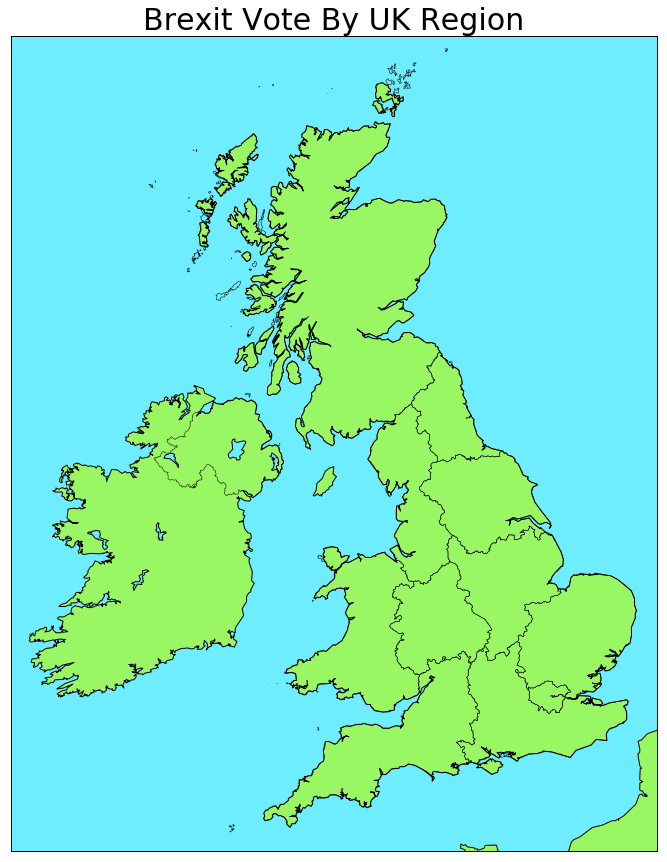

In [8]:
fig = plt.figure(figsize=[15,15])
plt.title('Brexit Vote By UK Region', fontsize=30)
# ax= fig.add_subplot(111)

map = Basemap(llcrnrlon=-10.5,llcrnrlat=49.5,urcrnrlon=3.5,urcrnrlat=59.5,
            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)
#ocean - 017b92
map.drawmapboundary(fill_color='#6dedfd')
map.fillcontinents(color='#9af764',lake_color='#6dedfd')
map.drawcoastlines()

map.readshapefile('../Resources/NUTS_Level_1_January_2018_Ultra_Generalised_Clipped_Boundaries_in_the_United_Kingdom/NUTS_Level_1_January_2018_Ultra_Generalised_Clipped_Boundaries_in_the_United_Kingdom_WGS84', 'ukregion')

# # map.ukregion_info
# for info, shape in zip(map.ukregion_info, map.ukregion):
#     if info['nuts118nm'] == 'Yorkshire and The Humber':
#         x, y = zip(*shape) 
#         map.plot(x, y, marker=None,color='m')
#         print(x)
#         print(y)

# patches   = []

# for info, shape in zip(map.ukregion_info, map.ukregion):
#     if info['nuts118nm'] == 'Yorkshire and The Humber':
# #         print(info)
#         print(np.array(shape))
#         patches.append(Polygon(np.array(shape), True))


# ax.add_collection(PatchCollection(patches, facecolor= 'blue', edgecolor='k', linewidths=1.5))

plt.show()

In [ ]:
file = netCDF4.Dataset(url)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['htsgwsfc'][1,:,:]
file.close()

# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig=plt.figure(figsize=(12, 8) )

# Miller projection:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')


# convert the lat/lon values to x/y projections.

x, y = m(*np.meshgrid(lon,lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('Example 1: NWW3 Significant Wave Height from NOMADS');